# Work with img

(238, 373, 3)


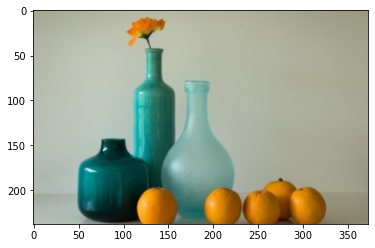

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def int_norm(num):
    # int - отбрасывает дробную часть, и так для того, чтобы дробь нормально округлялась, то к числу необходимо прибавить 0,5;
    # Если десятые больше 4, то округлится в большую сторону, если меньше, то в меньшую
    # При отрицательных числах также округляется правильно
    num = int(num + (0.5 if num > 0 else -0.5))
    return num         

img = plt.imread('test.jpg')
print(img.shape)
plt.imshow(img)

b_img = np.copy(img)
g_img = np.copy(img)
r_img = np.copy(img)

r_img[:,:,0] = 255
g_img[:,:,1] = 255
b_img[:,:,2] = 255
plt.imshow(img)

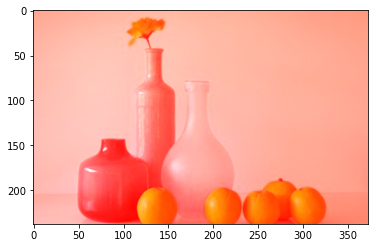

In [2]:
plt.imshow(r_img)

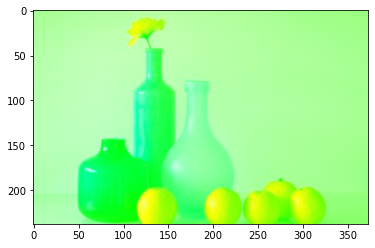

In [3]:
plt.imshow(g_img)

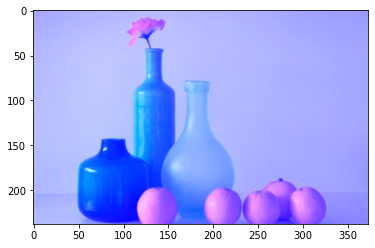

In [4]:
plt.imshow(b_img)

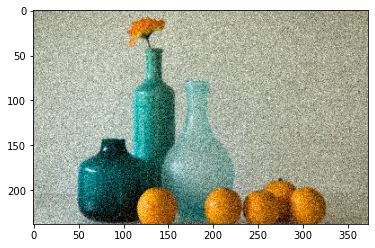

In [5]:
# Наводим шум
def shum(img, step, amp):
    copyImg = np.copy(img)
    a = amp * (np.max(copyImg) - np.min(copyImg))
    x = len(copyImg[:,0,0])
    y = len(copyImg[0,:,0])
    for i in range(0, x, step):
        for j in range(0, y, step):
            err = a * np.random.randn() # ЧТО ДЕЛАЕТ ЭТА СТРОКА?
            red = copyImg[i,j,0] + err
            green = copyImg[i,j,1] + err
            blue = copyImg[i,j,2] + err
            #RED check
            if red<0:
                copyImg[i,j,0] = 0
            elif red>255:
                copyImg[i,j,0] = 255
            else:
                copyImg[i,j,0] = red
            #GREEN check
            if green<0:
                copyImg[i,j,1] = 0
            elif green>255:
                copyImg[i,j,1] = 255
            else:
                copyImg[i,j,1] = green
            #BLUE check
            if blue<0:
                copyImg[i,j,2] = 0
            elif blue>255:
                copyImg[i,j,2] = 255
            else:
                copyImg[i,j,2] = blue
    return(copyImg)

shumnyImg = shum(img, 1, 0.1)
plt.imshow(shumnyImg)

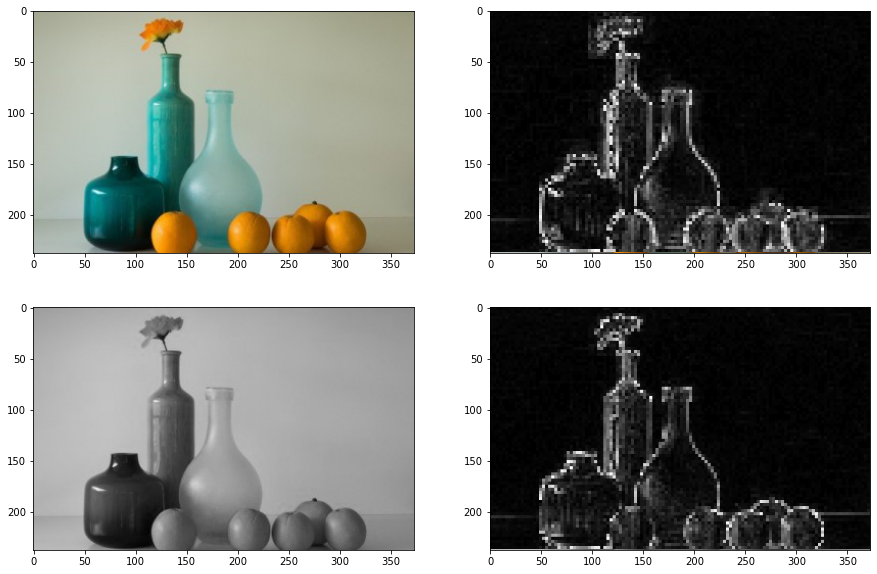

In [6]:
# Преобразуем в оттенок серого
def Sobel(img):
    copyImg = np.copy(img)
    x = len(copyImg[:,0,0])
    y = len(copyImg[0,:,0])
    arrx = np.array([[-1,-2,-1],
                      [0, 0, 0],
                      [1, 2, 1]])
    arry = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
    for i in range(0, x-2, 3):
        for j in range(0, y-2, 3):
            rx = np.sum(copyImg[i:i+3, j:j+3, 0] * arrx)
            gx = np.sum(copyImg[i:i+3, j:j+3, 0] * arrx)
            bx = np.sum(copyImg[i:i+3, j:j+3, 0] * arrx)
            
            ry = np.sum(copyImg[i:i+3, j:j+3, 0] * arry)
            gy = np.sum(copyImg[i:i+3, j:j+3, 0] * arry)
            by = np.sum(copyImg[i:i+3, j:j+3, 0] * arry)
            
            copyImg[i:i+3, j:j+3, 0] = abs(rx) + abs(ry)
            copyImg[i:i+3, j:j+3, 1] = abs(gx) + abs(gy)
            copyImg[i:i+3, j:j+3, 2] = abs(bx) + abs(by)
    return copyImg
    
def gray(img):
    copyImg = np.copy(img)
    x = len(copyImg[:,0,0])
    y = len(copyImg[0,:,0])
    for i in range(0, x):
        for j in range(0, y):
            # Находим средний оттенок по трем цветам в пикселе
            red = int(copyImg[i,j,0])
            green = int(copyImg[i,j,1])
            blue = int(copyImg[i,j,2])
            #mid = int_norm(red * 0.2126 + green * 0.7152 + blue * 0.0722) # Еще один способ, лучше, чем (r+g+b)/3
            mid = int_norm((red+green+blue)/3)
            # Присваиваем средний цвет к каждому оттенку пикселя
            copyImg[i,j,0] = mid
            copyImg[i,j,1] = mid
            copyImg[i,j,2] = mid
    return(copyImg)

grayImg = gray(img)
gray_sobel = Sobel(grayImg)
sobel = Sobel(img) # default image try use to Sobel algorithm 

fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(sobel)
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(grayImg)
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(gray_sobel)


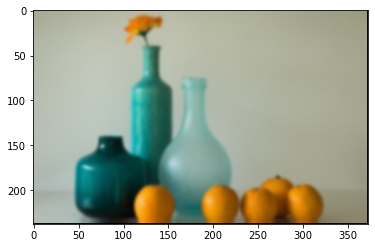

In [7]:
# Very slow algorithm!!!
def blur(img, core_size, how_much_times):
    copyImg = np.copy(img)
    result = np.zeros(copyImg.shape, dtype=int)
    x = len(img[:,0,0])
    y = len(img[0,:,0])
    #flag = bool(core_size%2) # even or not
    #core = int((core_size)/2) # find to centre of kernel
    for _ in range(how_much_times):
        # Run over full img
        for i in range(x-core_size):
            for j in range(y-core_size):
                # Run over kernel
                for n in range(i, i+core_size):
                    for m in range(j, j+core_size):
                        result[n,m,0] = np.round(np.mean(copyImg[i:i+core_size, j:j+core_size, 0]))
                        result[n,m,1] = np.round(np.mean(copyImg[i:i+core_size, j:j+core_size, 1]))
                        result[n,m,2] = np.round(np.mean(copyImg[i:i+core_size, j:j+core_size, 2]))
        copyImg = np.copy(result)
    return result

blurImg = blur(img, 3, 3)
plt.imshow(blurImg)

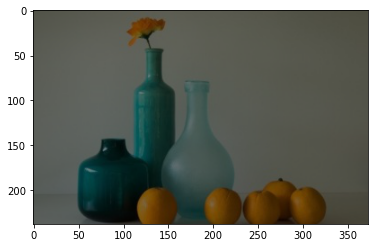

In [8]:
# Change brightness of img
def Brightness(img, N):
    copyImg = np.copy(img)
    x = len(img[:,0,0])
    y = len(img[0,:,0])
    for i in range(x):
        for j in range(y):
            # RED
            r = int_norm(copyImg[i,j,0] * N)
            r = min(255, max(0, r))
            # GREEN
            g = int_norm(copyImg[i,j,1] * N)
            g = min(255, max(0, g))
            # BLUE
            b = int_norm(copyImg[i,j,2] * N)
            b = min(255, max(0,b))
            copyImg[i,j,0] = r
            copyImg[i,j,1] = g
            copyImg[i,j,2] = b
    return copyImg

brightness_pic = Brightness(img, 0.5)
plt.imshow(brightness_pic)

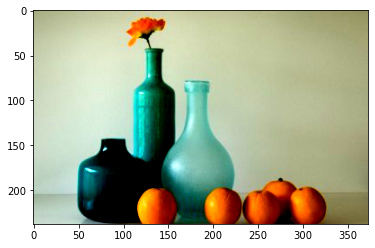

In [9]:
# Change contrast of img
def Brightness(r,g,b):
    return r*0.299 + g*0.587 + b*0.144

def Contrast(img, N):
    copyImg = np.copy(img)
    x = len(img[:,0,0])
    y = len(img[0,:,0])
    countOfPixels = x * y
    sumOfIntensity = 0
    # First step
    for i in range(x):
        for j in range(y):
            sumOfIntensity += Brightness(copyImg[i,j,0], copyImg[i,j,1], copyImg[i,j,2])
    avg = int_norm(sumOfIntensity/countOfPixels)
    # Second step
    palette = []
    for i in range(256):
        temp = int(avg + N * (i - avg))
        if temp < 0:
            temp = 0
        elif temp > 255:
            temp = 255
        palette.append(temp)
    # Third step
    for i in range(x):
        for j in range(y):
            copyImg[i,j,0] = palette[copyImg[i,j,0]]
            copyImg[i,j,1] = palette[copyImg[i,j,1]]
            copyImg[i,j,2] = palette[copyImg[i,j,2]]
    return copyImg

contrastImg = Contrast(img, 2)
plt.imshow(contrastImg)